## Objective: 

You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

In [1]:
#!pip install matplotlib

In [2]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    

from fancyimpute import KNN  # for all KNN family operations
from ggplot import *

%matplotlib inline

Using TensorFlow backend.


In [3]:
#Setting the working directory

os.chdir("C:/Users/patil/Downloads/Cab-Fare-Prediction-master - Copy")
print(os.getcwd())

C:\Users\patil\Downloads\Cab-Fare-Prediction-master - Copy


In [4]:
train  = pd.read_csv("train_cab.csv")

In [5]:
train.pickup_datetime.isnull().sum()

0

In [6]:
#Loading the data:
train  = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"}) # fill 43 outlier with missing value
test   = pd.read_csv("test.csv")

In [7]:
train.pickup_datetime.isnull().sum() 

1

## Step 1 = EDA_Understanding the data :

In [8]:
train.head() #checking first five rows of the training dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [9]:
test.head() #checking first five rows of the test dataset

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [10]:
print("shape of training data is: ",train.shape) #checking the number of rows and columns in training data
print("shape of test data is: ",test.shape) #checking the number of rows and columns in test data

shape of training data is:  (16067, 7)
shape of test data is:  (9914, 6)


In [11]:
train.dtypes #checking the data-types in training dataset

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

##  Univariate-Multivariate Analysis

### Checking distribution of each var

In [12]:
train.passenger_count.describe()

count    16012.000000
mean         2.625070
std         60.844122
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

C:\Users\patil\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


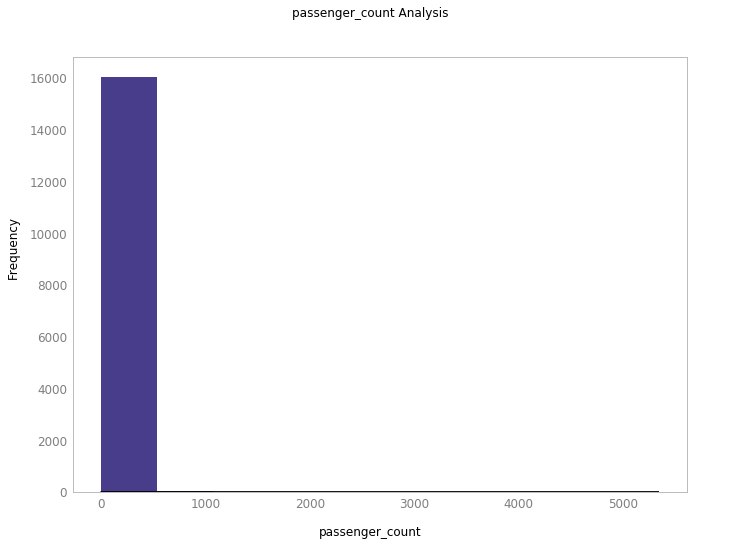

<ggplot: (-9223371912315311744)>

In [13]:
#Histogram 
ggplot(train, aes(x = 'passenger_count')) + geom_histogram(fill="DarkSlateBlue", colour = "black") +\
    geom_density() +\
    theme_bw() + xlab("passenger_count") + ylab("Frequency") + ggtitle("passenger_count Analysis") +\
    theme(text=element_text(size=20))


 As because same values got repeated in every variable we are getting biased Histogram,
 So first we will clean the data then we will go for visualisation, so as we can get visualization of real values instead of such outiers,   _ 
As 5342 count dominating 5 6 passenger count , plot passenger_count histogram aftr removing 5342 or greater counts,



C:\Users\patil\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\patil\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\patil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\patil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


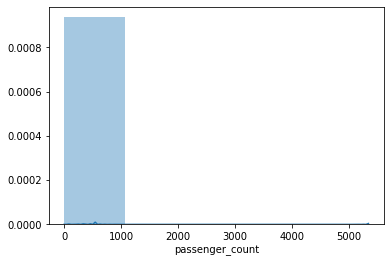

In [14]:
############ univariate analysis and bivariate analysis ##########################     , errors = "coerce"

#Analysis for single variable in the dataset is Univariate Analysis and plotting relation between 2 variables is bivariate analysis.

sns.distplot( train["passenger_count"] ,bins = 5)


In [15]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [16]:
# train = train.drop( train[train["passenger_count"]==0].index) 
print(train.passenger_count.isnull().sum())

55


In [17]:
test.dtypes #checking the data-types in test dataset

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [18]:
train.describe() 

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


Here we can see pickup datetime and fare amount is of object type. So we need to change the data type of both.

As you see count of passegnger_count dropped to 16012 it means there are some missing values present,

### Missing Value Analysis

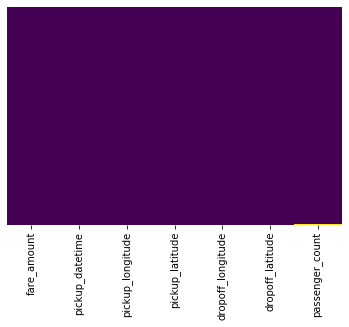

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap="viridis")

In [20]:

train["fare_amount"] = pd.to_numeric(train["fare_amount"], errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [21]:
print(train.isnull().sum().sort_values( ascending = False))
print(train.shape)

passenger_count      55
fare_amount          25
pickup_datetime       1
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
dtype: int64
(16067, 7)


In [22]:
############# missing value analysis ################

#Calculating the null values in the dataframe
missing_value = pd.DataFrame(train.isnull().sum())

missing_value = (missing_value/len(train))*100
missing_value.reset_index(drop=True)

missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Arranging Missing Values in Decreasing Order
missing_value = missing_value.sort_values('Missing_percentage', ascending = False).reset_index()
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#save output results 
missing_value.to_csv("Missing_perc.csv", index = False)
missing_value

,Variables,Missing_percentage
0,passenger_count,0.342317
1,fare_amount,0.155598
2,pickup_datetime,0.006224
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [23]:
# eliminating rows for which value of data is missing ( removing (<1 %) 55 &24/16000 rows will not affect our data)

train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15986, 7)
0


In [24]:

test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [25]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In test , no missing values present 

### Feature Engineering

In [26]:
print(train.dtypes)
print(train.shape)

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object
(15986, 7)


In [27]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime

train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [28]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

print(train.dtypes)  #Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object


In [29]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [30]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

print(test.dtypes)  #Re-checking test datatypes after conversion

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object


Checking the passenger count variable : 

In [31]:
print(train["passenger_count"].describe())
print(train.shape)

count    15986.000000
mean         2.623272
std         60.892140
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64
(15986, 13)


In [32]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)
train = train.drop(train[train["passenger_count"]< 1 ].index, axis=0)
train = train.drop(train[train["passenger_count"]== 0 ].index, axis=0) #Also removing the values with passenger count of 0.
train = train.drop(train[train["passenger_count"]== 1.2 ].index, axis=0) # passenger count value of 1.3 which is not possible.
train = train.drop(train[train["passenger_count"]== 1.3 ].index, axis=0)


In [33]:
train.shape

(15908, 13)

In [34]:
train["passenger_count"].describe()

count    15908.000000
mean         1.649610
std          1.265799
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [35]:
train.passenger_count.unique()

array([1., 2., 3., 6., 5., 4.])

Next checking the Fare Amount variable :

In [36]:
##finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
           ...   
2780         0.01
10002        0.00
2486        -2.50
2039        -2.90
13032       -3.00
Name: fare_amount, Length: 15908, dtype: float64

We can see  maximum number of passanger count is 5345 which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV).
1. It means there are outlers in data , first we will impute them manually

In [37]:
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)

# Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
# so we will remove the rows having fare amounting more that 454 as considering them as outliers

train = train.drop(train[train["fare_amount"]> 300 ].index, axis=0)
train.shape

# eliminating rows for which value of "fare_amount" is missing ( removing 24rows will not affect our data)
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15899, 13)
0


In [38]:
train["fare_amount"].sort_values(ascending=False).head(10)    # still we have outliers we will remove them by boxplot

1335     180.00
1483     165.00
6630     128.83
14142    108.00
12349    104.67
12915     96.00
7810      95.00
9431      88.00
10077     87.30
12614     87.00
Name: fare_amount, dtype: float64

In [39]:
train["fare_amount"].describe()


count    15899.000000
mean        11.321895
std          9.668439
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

In [40]:
#Calculating the null values in the dataframe
pd.DataFrame(train.isnull().sum())


,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
year,0
Month,0
Date,0


In [41]:
#Calculating the null values in the dataframe
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

### Now we have successfully cleared our both datasets. Thus proceeding for further operations:

Calculating distance based on the given coordinates :


In [42]:
# As we know that we have given pickup longitute and latitude values and same for drop. 
# So we need to calculate the distance Using the haversine formula and we will create a new variable called distance

from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [43]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [44]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [45]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [46]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [47]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011,7,30,5,11,15,33.850093


In [48]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance


In [49]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance


In [50]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance


In [51]:

#Hence dropping one value of >90

train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)
train.shape

(15898, 14)

Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [52]:
train[train['passenger_count']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance


In [53]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [54]:
train.distance.head().sort_values(ascending=True)

0    1.030764
2    1.389525
4    1.999157
3    2.799270
1    8.450134
Name: distance, dtype: float64

In [55]:
train.shape

(15898, 8)

In [56]:


cat_var=['Hour','Day', 'Date', 'Month', 'year', 'passenger_count']

train[cat_var]=train[cat_var].apply(lambda x: x.astype('category') )
test[cat_var]=test[cat_var].apply(lambda x: x.astype('category') )

train.dtypes

fare_amount         float64
passenger_count    category
year               category
Month              category
Date               category
Day                category
Hour               category
distance            float64
dtype: object

In [57]:
train.dtypes

fare_amount         float64
passenger_count    category
year               category
Month              category
Date               category
Day                category
Hour               category
distance            float64
dtype: object

In [58]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [59]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [60]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [61]:
test.dtypes

passenger_count    category
year               category
Month              category
Date               category
Day                category
Hour               category
distance            float64
dtype: object

## Outlier Analysis and Synthesis by Box Plot
1. Can only applied on cont vars ( Distance & fare_amount )
2. fare_amount is TV hence not needed for it


In [62]:
## finding decending order of fare to get to know whether the outliers are presented or not

train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
4473        0.000000
7929        0.000000
542         0.000000
540         0.000000
12412       0.000000
Name: distance, Length: 15898, dtype: float64

1. As we can see that top 23 values in the distance variables are very high It means more than 8000 Kms distance that they have travelled, which is not possible in a day.
2. Also just after 23rd value from the top, the distance goes down to 127, which means these values are showing some outliers
We need to remove these values
3. It means we still have outliers, now this time it would be very dificult to fine them manually,
4. So apply Box Plot Technique

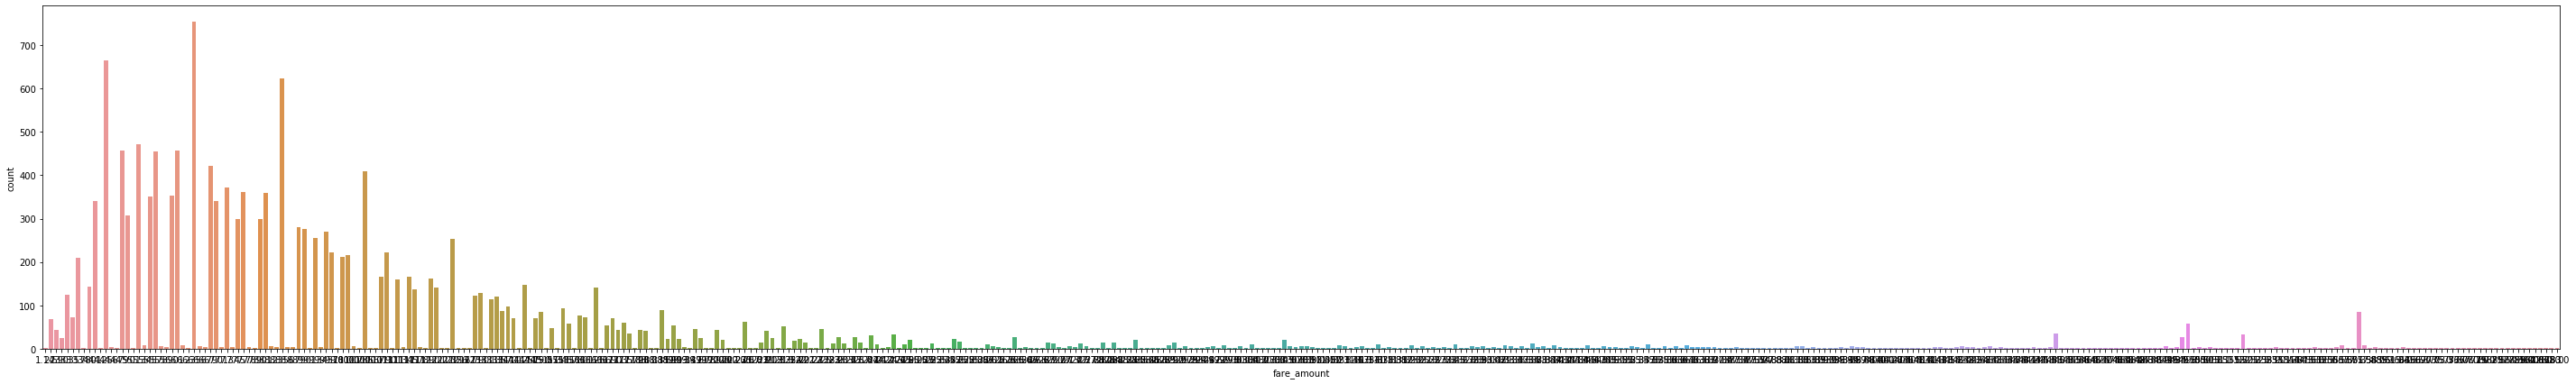

In [63]:
# Count plot on fare_amount
plt.figure(figsize=(50,7))
sns.countplot(x="fare_amount", data=train) 

We can see that , most of the times fare charged is 4$ to 12$s, and very least of the time (0.01 %) >60 Rs fare remaining fare is charged, means we can remove those observations considering them as outliers

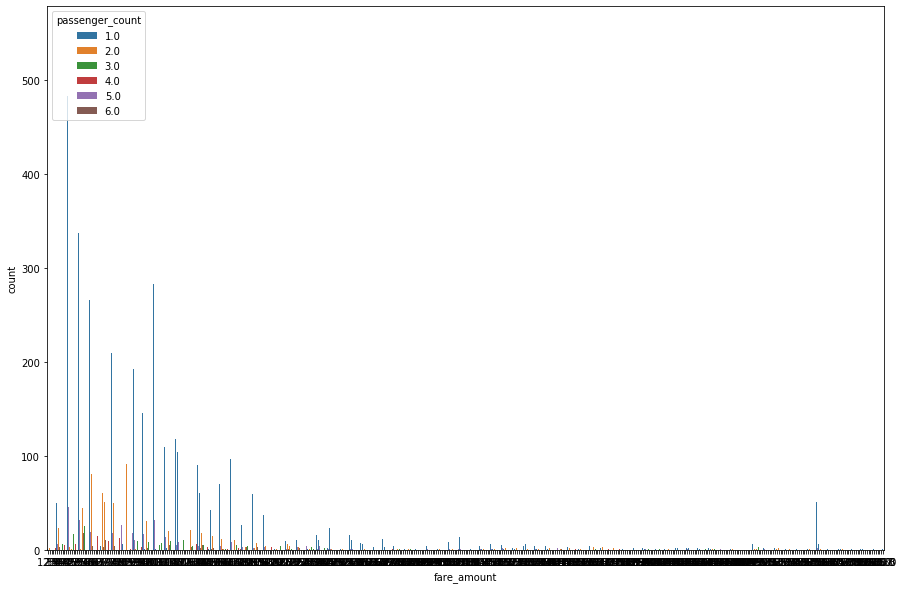

In [67]:
plt.figure(figsize = (15,10))
sns.countplot( x = "fare_amount" , data = train, hue = "passenger_count")


 As because same values got repeated in every variable we are getting biased Histogram,
 So first we will clean the data then we will go for visualisation, so as we can get visualization of real values instead of such outiers,   _ 
As 5342 count dominating 5 6 passenger count , plot passenger_count histogram aftr removing 5342 or greater counts,



Lets check once if we still have outliers or not

### Apply Box Plot to Analyse and synthesyse outliers

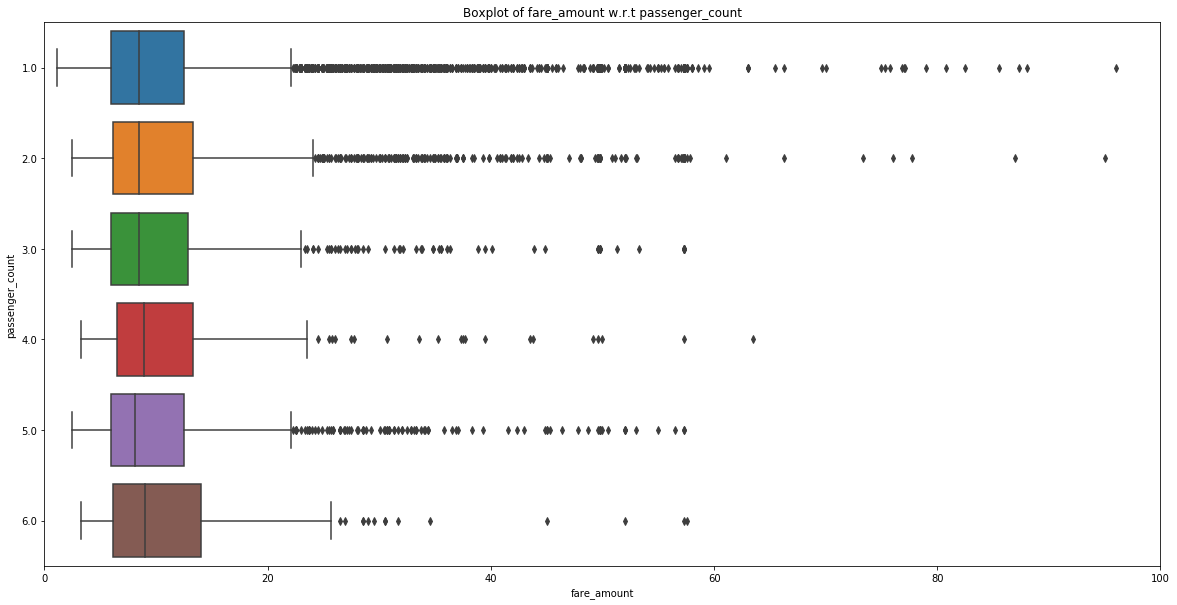

In [68]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
_ = sns.boxplot(x=train['fare_amount'],y=train['passenger_count'],data=train,orient='h')
plt.title('Boxplot of fare_amount w.r.t passenger_count')
# plt.savefig('Boxplot of fare_amount w.r.t passenger_count.png')
plt.show()

Simillarly check outliers present in distance var, and similarly drop / impute those obs

{'whiskers': [<matplotlib.lines.Line2D at 0x1e1f8547f48>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1f8544b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1f85476c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1f8541c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1f8530bc8>],
 'means': []}

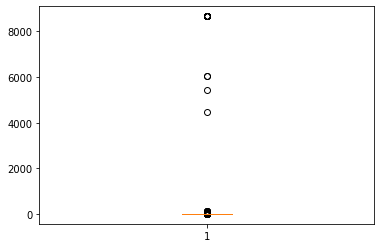

In [65]:
 # Plot Box Plot to see outliers
    
     # We will drop / impute those obs containing these irrelevant values
    # Drop = When obs are least ( caution= dropped obs may important for other vars)
    # Impute = When obs are more 

    
%matplotlib inline

plt.boxplot(train['distance'])

there are outliers as vehicle cannot go upto 4000 to 8000 km in a city

In [66]:
 print(train.distance.shape)
    
#Detect and  the quartiles

q750, q250 = np.percentile(train['distance'], [75 ,25])

iqr = q750 - q250
print(iqr)

# #Calculate inner and outer fence
minimum = q250 - (iqr*1.5)
maximum = q750 + (iqr*1.5)

print(minimum)
print(maximum)


#Replace with NA
train.loc[train['distance'] < minimum,:'distance'] = np.nan

train.loc[train['distance'] > maximum,:'distance'] = np.nan



#   #1000  As obs are more

# train = train.drop(train[train['distance']<minimum].index)
# train = train.drop(train[train['distance']>maximum].index)

print(train.distance.isnull().sum()  )
print(train.distance.shape)

(15898,)
3.8542751043645893
-2.742036547656749
7.812062095577392
1379
(15898,)


In [67]:

# apply KNN imputation algorithm to all variables
train =pd.DataFrame(KNN(k=3).fit_transform(train),columns=train.columns) # 3.421351597768989


 # or

# #fill that nan with mean

# train['distance'].loc[70]
# train['distance'] =train['distance'].fillna(train['distance'].mean())  # 15.074937103477325    
    
#     #fill that nan with median
# train['distance'] =train['distance'].fillna(train['distance'].median())  # 12.1259553273507295


Imputing row 1/15898 with 0 missing, elapsed time: 85.494
Imputing row 101/15898 with 0 missing, elapsed time: 85.499
Imputing row 201/15898 with 0 missing, elapsed time: 85.503
Imputing row 301/15898 with 0 missing, elapsed time: 85.504
Imputing row 401/15898 with 0 missing, elapsed time: 85.505
Imputing row 501/15898 with 0 missing, elapsed time: 85.506
Imputing row 601/15898 with 0 missing, elapsed time: 85.507
Imputing row 701/15898 with 0 missing, elapsed time: 85.508
Imputing row 801/15898 with 0 missing, elapsed time: 85.509
Imputing row 901/15898 with 0 missing, elapsed time: 85.510
Imputing row 1001/15898 with 0 missing, elapsed time: 85.512
Imputing row 1101/15898 with 0 missing, elapsed time: 85.513
Imputing row 1201/15898 with 0 missing, elapsed time: 85.514
Imputing row 1301/15898 with 0 missing, elapsed time: 85.515
Imputing row 1401/15898 with 0 missing, elapsed time: 85.515
Imputing row 1501/15898 with 0 missing, elapsed time: 85.517
Imputing row 1601/15898 with 0 missi

[KNN] Warning: 11032/127184 still missing after imputation, replacing with 0


In [68]:

print(train.distance.isnull().sum()  )
print(train.distance.shape)

0
(15898,)


In [69]:
train

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157
...,...,...,...,...,...,...,...,...
15893,10.9,1.0,2009.0,5.0,20.0,2.0,18.0,3.357490
15894,6.5,1.0,2014.0,12.0,12.0,4.0,7.0,0.850044
15895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
15896,8.5,1.0,2009.0,11.0,11.0,2.0,11.0,1.469105


In [70]:
train = train.drop((train[train['distance']== 0]).index, axis=0)
train[train['distance']== 0].shape

(0, 8)

In [71]:

train.isnull().sum()

fare_amount        0
passenger_count    0
year               0
Month              0
Date               0
Day                0
Hour               0
distance           0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e1f8503cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1f8503e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1f8503508>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1f87b5e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1f87b5f08>],
 'means': []}

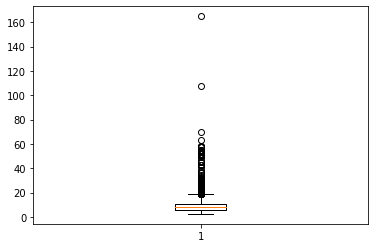

In [72]:

# Now plot 

%matplotlib inline

plt.boxplot(train['fare_amount'])

In [73]:
 print(train.distance.shape)
    
#Detect and  the quartiles

q750, q250 = np.percentile(train['fare_amount'], [75 ,25])

iqr = q750 - q250
print(q750)

# #Calculate inner and outer fence
minimum = q250 - (iqr*1.5)
maximum = q750 + (iqr*1.5)

print(minimum)
print(maximum)


#Replace with NA
train.loc[train['fare_amount'] < minimum,:'fare_amount'] = np.nan

train.loc[train['fare_amount'] > maximum,:'fare_amount'] = np.nan



#   #1k  As obs are less, hence Drop obs 
# train = train.drop(train[train['distance']<minimum].index)
# train = train.drop(train[train['distance']>maximum].index)

print(train.fare_amount.isnull().sum()  )
print(train.fare_amount.shape)

(14065,)
11.0
-2.249999999999999
18.95
589
(14065,)


In [74]:

        #apply knn imputation algorithm to all variables

train=pd.DataFrame(KNN(k=3).fit_transform(train),columns=train.columns)




Imputing row 1/14065 with 0 missing, elapsed time: 65.021
Imputing row 101/14065 with 0 missing, elapsed time: 65.022
Imputing row 201/14065 with 0 missing, elapsed time: 65.030
Imputing row 301/14065 with 0 missing, elapsed time: 65.033
Imputing row 401/14065 with 0 missing, elapsed time: 65.035
Imputing row 501/14065 with 0 missing, elapsed time: 65.038
Imputing row 601/14065 with 0 missing, elapsed time: 65.040
Imputing row 701/14065 with 0 missing, elapsed time: 65.042
Imputing row 801/14065 with 0 missing, elapsed time: 65.043
Imputing row 901/14065 with 0 missing, elapsed time: 65.045
Imputing row 1001/14065 with 0 missing, elapsed time: 65.047
Imputing row 1101/14065 with 0 missing, elapsed time: 65.049
Imputing row 1201/14065 with 0 missing, elapsed time: 65.051
Imputing row 1301/14065 with 0 missing, elapsed time: 65.053
Imputing row 1401/14065 with 0 missing, elapsed time: 65.056
Imputing row 1501/14065 with 0 missing, elapsed time: 65.058
Imputing row 1601/14065 with 0 missi

In [75]:

print(train.fare_amount.isnull().sum()  )
print(train.fare_amount.shape)

0
(14065,)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e1f87b2288>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1f87b2d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1f87a1a88>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1f87b2f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1f87afdc8>],
 'means': []}

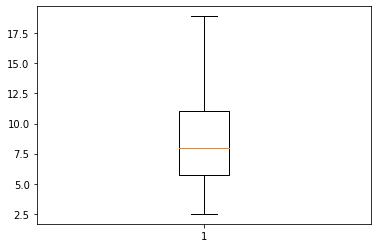

In [76]:

# Now plot 

%matplotlib inline

plt.boxplot(train['fare_amount'])

In [77]:
train.head(20)

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
2,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
3,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157
4,12.1,1.0,2011.0,1.0,6.0,3.0,9.0,3.787239
5,7.5,1.0,2012.0,11.0,20.0,1.0,20.0,1.555807
6,16.5,1.0,2012.0,1.0,4.0,2.0,17.0,4.155444
7,8.9,2.0,2009.0,9.0,2.0,2.0,1.0,2.849627
8,5.3,1.0,2012.0,4.0,8.0,6.0,7.0,1.374577
9,4.1,2.0,2009.0,11.0,6.0,4.0,1.0,0.717767


As you can see  we have successfully replaced outliers with KNN imputation in order to reduce loss of information

#### As of now we got data having zero missing values and Outliers

In [78]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

 As data types has been changed , redefining its data types

In [79]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['fare_amount'] = train['fare_amount'].astype('float64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [80]:


cat_var=['Hour','Day', 'Date', 'Month', 'year', 'passenger_count']

train[cat_var]=train[cat_var].apply(lambda x: x.astype('category') )
test[cat_var]=test[cat_var].apply(lambda x: x.astype('category') )

train.dtypes

fare_amount         float64
passenger_count    category
year               category
Month              category
Date               category
Day                category
Hour               category
distance            float64
dtype: object

In [81]:
test.dtypes

passenger_count    category
year               category
Month              category
Date               category
Day                category
Hour               category
distance            float64
dtype: object

# Data Visualization :

Visualization of following:

1. Number of Passengers effects the the fare
2. Pickup date and time effects the fare
3. Day of the week does effects the fare
4. Distance effects the fare

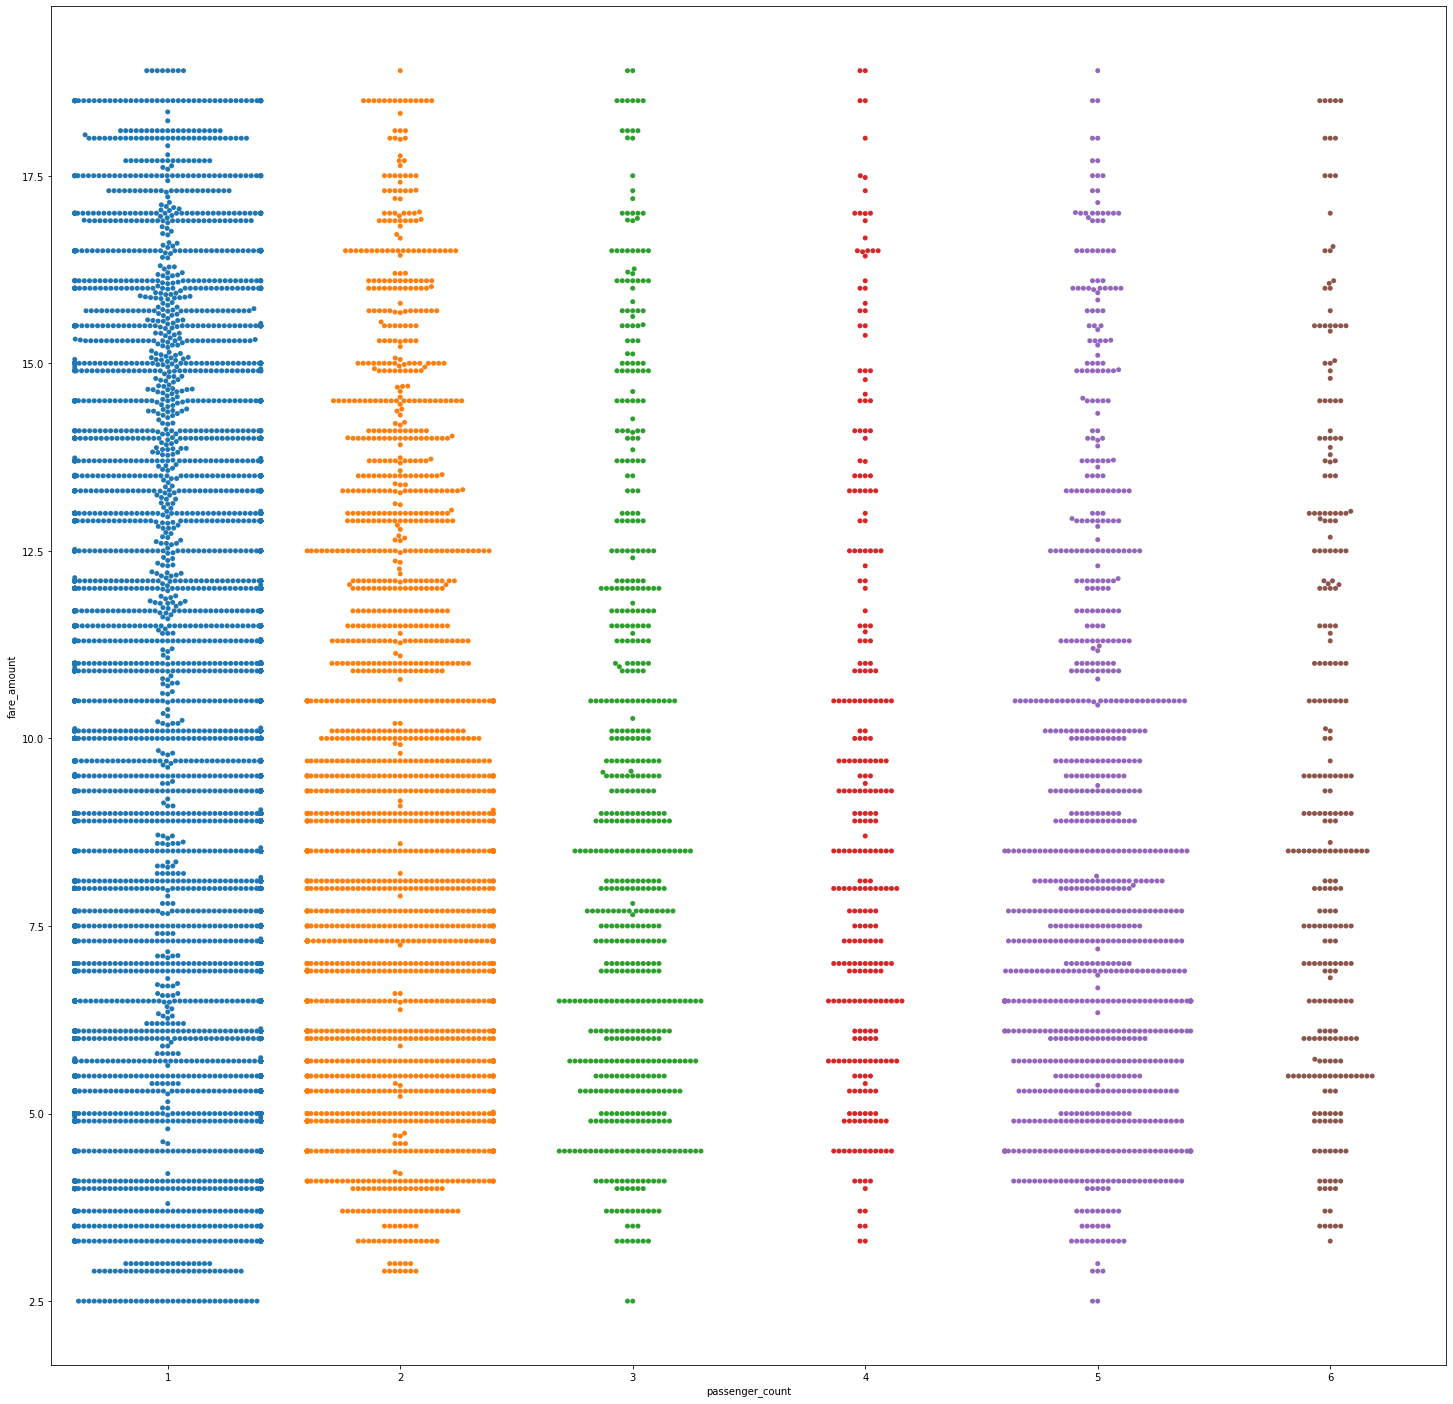

In [82]:
#Some Bee Swarmplots

plt.figure(figsize=(25,25))
_ = sns.swarmplot(x='passenger_count',y='fare_amount',data=train) # plt.title('Cab Fare w.r.t passenger_count')


<Figure size 2880x2160 with 0 Axes>

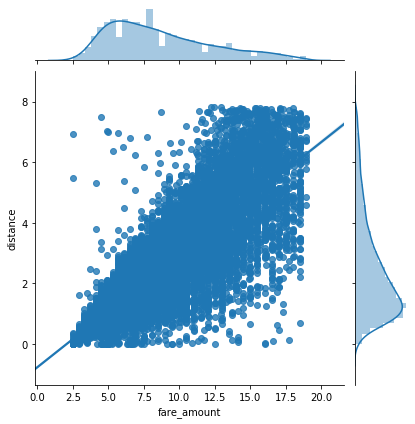

In [83]:

# -Jointplots for Bivariate Analysis.
# -Here Scatter plot has regression line between 2 variables along with separate Bar plots of both variables.
plt.figure(figsize=(40,30))
_ = sns.jointplot(x='fare_amount',y='distance',data=train,kind = 'reg')


### As graph shows that our data is linearly distributed

<Figure size 2160x2160 with 0 Axes>

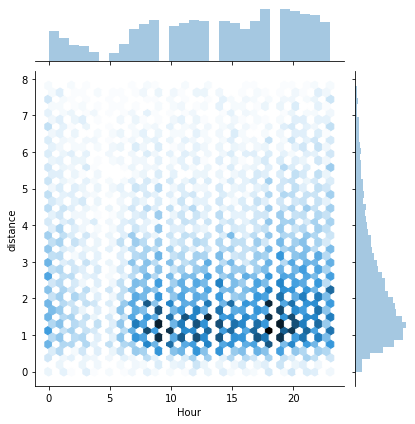

In [84]:

# -Jointplots for Bivariate Analysis.
# -Here Scatter plot has regression line between 2 variables along with separate Bar plots of both variables.
plt.figure(figsize=(30,30))
_ = sns.jointplot(x='Hour',y='distance',data=train,kind = 'hex')


In [85]:
train.fare_amount.max()

18.9

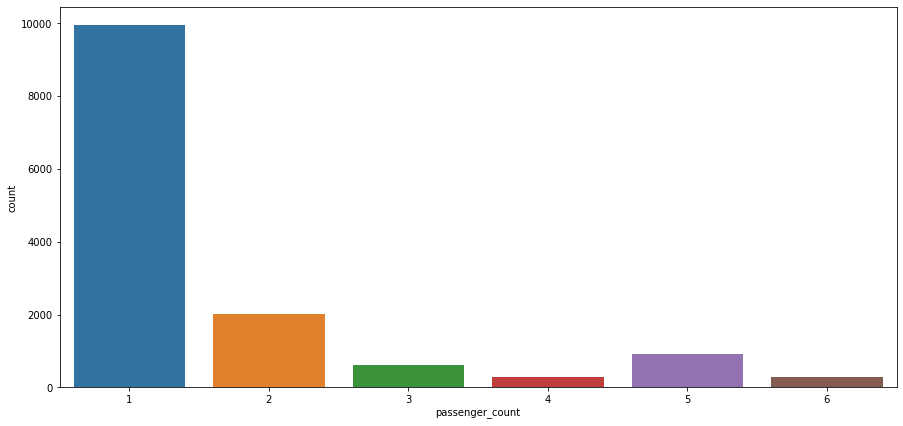

In [86]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

<Figure size 2160x2160 with 0 Axes>

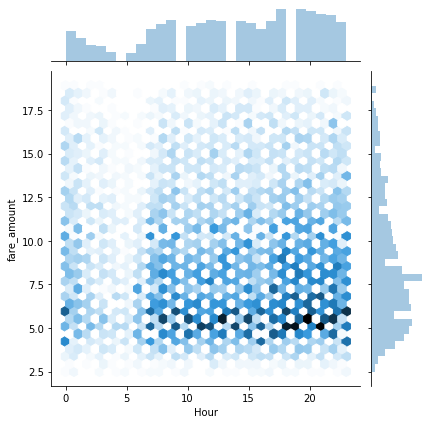

In [87]:

# -Jointplots for Bivariate Analysis.
# -Here Scatter plot has regression line between 2 variables along with separate Bar plots of both variables.
plt.figure(figsize=(30,30))
_ = sns.jointplot(x='Hour',y='fare_amount',data=train,kind = 'hex')


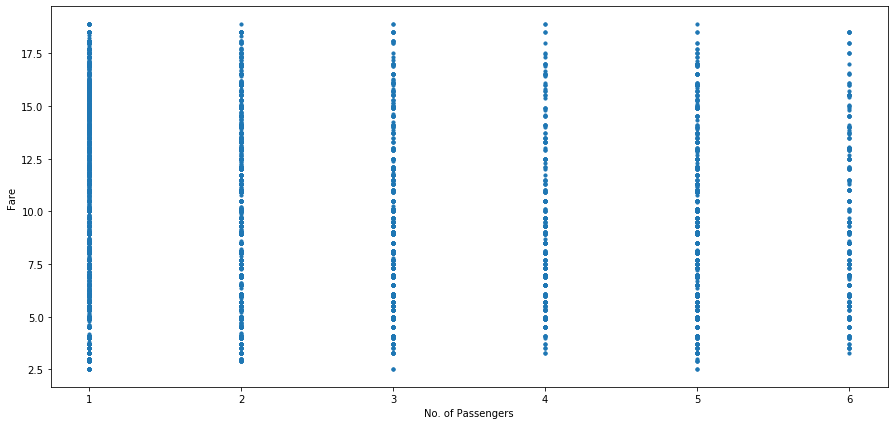

In [88]:
# Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

### Observations :
   By seeing the above plots we can easily conclude that:
1. single travelling passengers are most frequent travellers.
2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

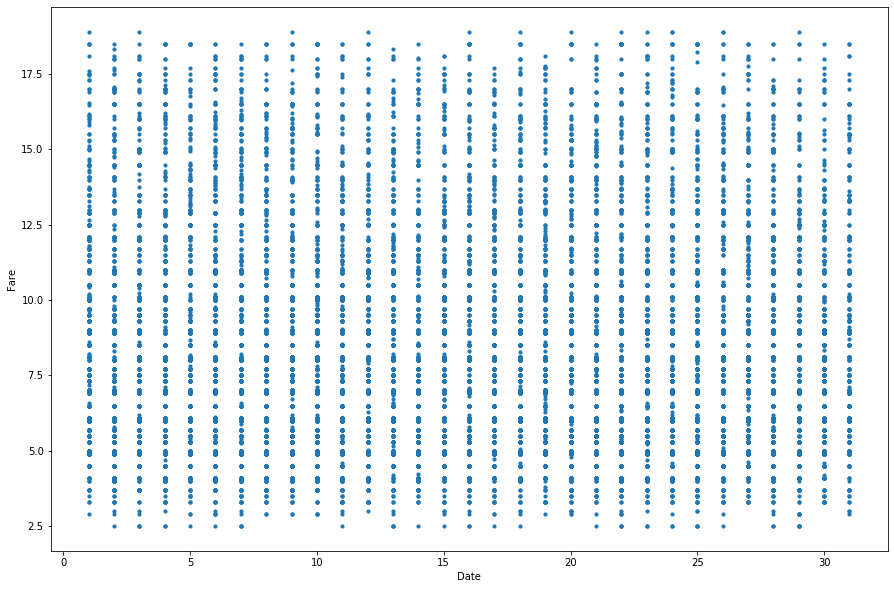

In [89]:
#Relationship between date and Fare

plt.figure(figsize=(15,10))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

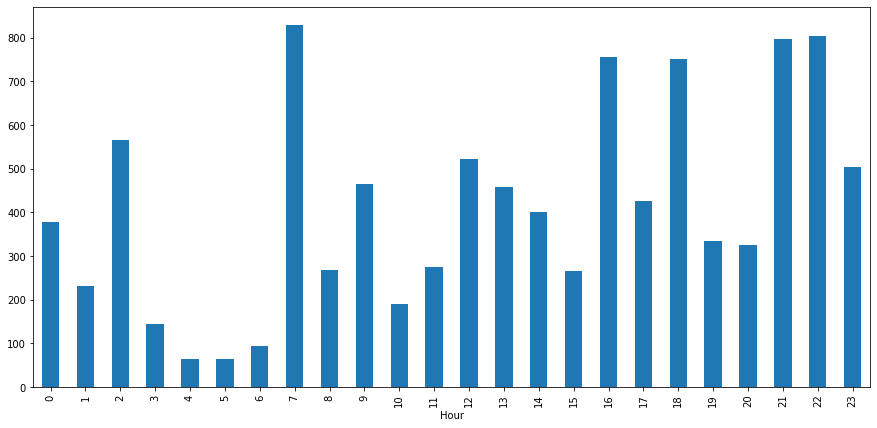

In [90]:
plt.figure(figsize=(15,7))
test.groupby(test["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

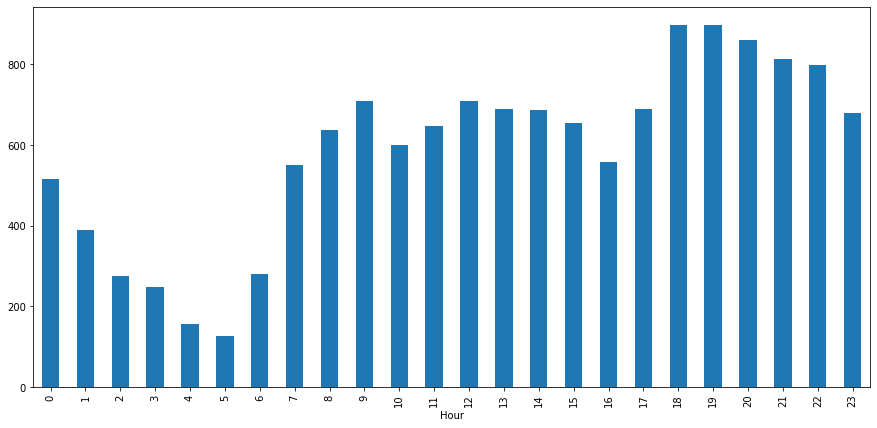

In [91]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

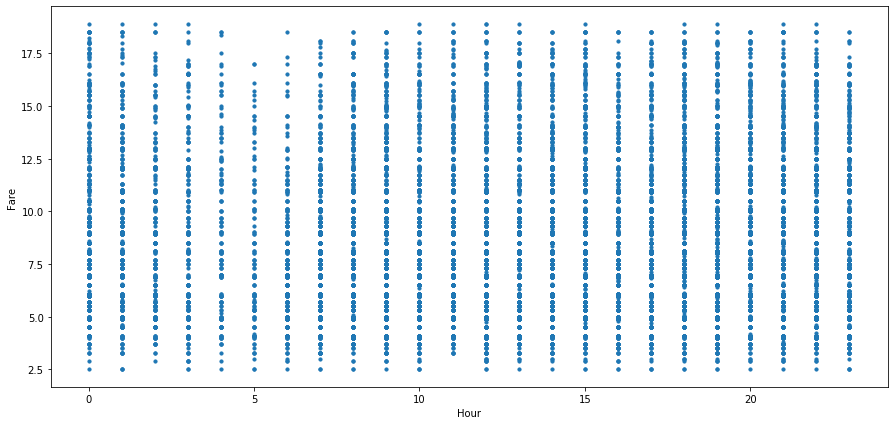

In [92]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest. 
Hence we can assume that cabs taken early in morning and late at night are costliest


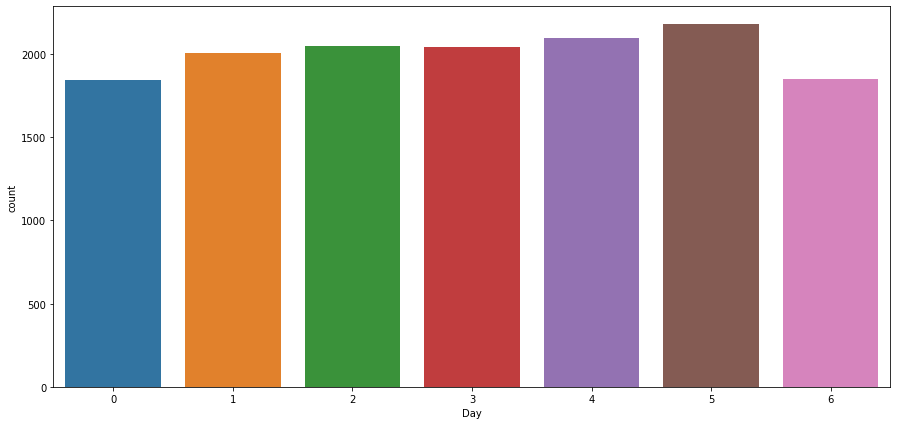

In [93]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

Observation :
The day of the week does not seem to have much influence on the number of cabs ride

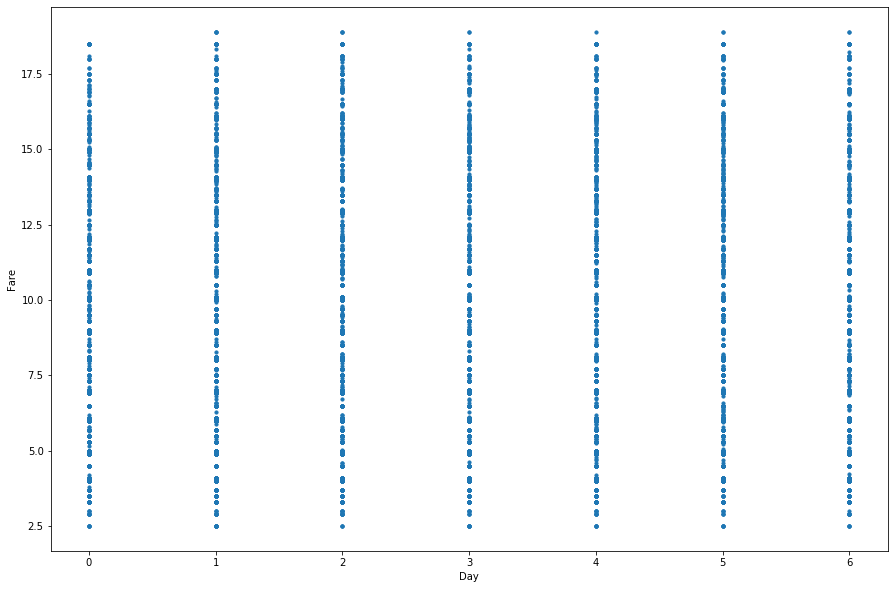

In [94]:
#Relationships between day and Fare
plt.figure(figsize=(15,10))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

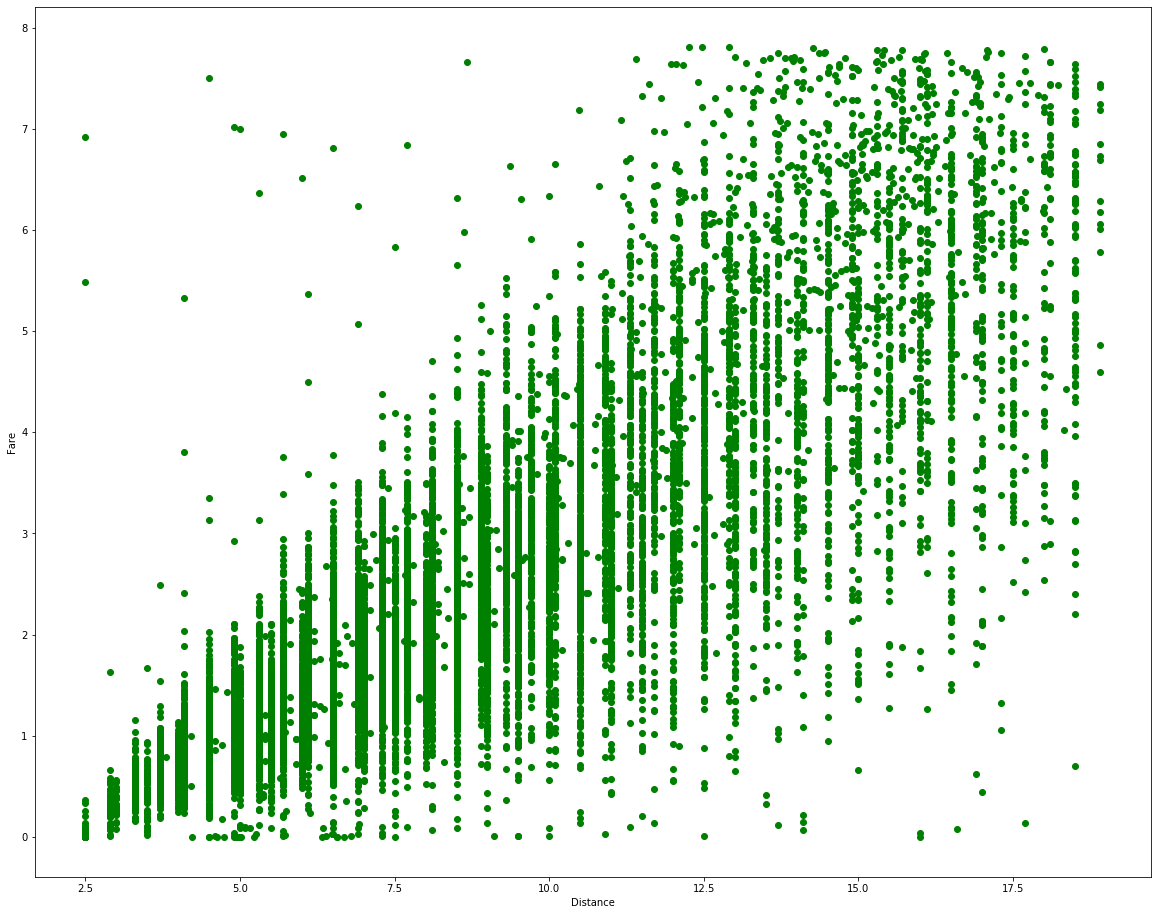

In [95]:
#Relationship between distance and fare 
plt.figure(figsize=(20,16))
plt.scatter(x = train['fare_amount'],y = train['distance'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

It is quite obvious that distance will effect the amount of fare Linearly

# Next step = Feature Selection

#### Selection of categorical vars -- Chi_Sqr Test of Independance

#### Selection of Nemerical vars i.e. ( cnames ) --  Correlation analysis 


In [96]:
num_var=['fare_amount','distance']

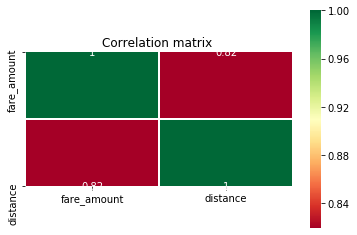

In [97]:
# heatmap using correlation matrix plt.figure(figsize=(15,15))
_ = sns.heatmap(train[num_var].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
plt.savefig('correlation.png')
plt.show()


 1.  Dark colour = Strong Relation
 2.  Light colour = weak relation

CONCLUSION :
1. As we can see from above correlation plot fare_amount and distance are highly corelated to each other.
2. As distance is contributing mainly in explaining TV we are not gonna remove it


#### Selection of categorical vars -- Chi_Sqr Test of Independance


-Hypothesis testing :
1. -Null Hypothesis: 2 variables are independent. ( No relation between TV and that var)
2. -Alternate Hypothesis: 2 variables are dependent. ( that var is relative to TV, hence keep it)
. -If p-value is <0.05 then we reject the null hypothesis saying that 2 variables are dependent( there is relation).

In [98]:
cat_var=['Hour','Day', 'Date', 'Month', 'year', 'passenger_count']

In [99]:
from scipy.stats import chi2_contingency

In [100]:
#loop for chi square values   # p = 0.05,  if p < 0.05, Reject Null hyp., Consider that var

for i in cat_var:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train['fare_amount'], train[i]))
    print(p)

Hour
0.0001250280625633715
Day
0.5726683815844251
Date
0.6207184063494285
Month
0.02002921734518126
year
0.0
passenger_count
2.916415388015469e-05


Irrespective of date your fare amount remains constant, as per visualizations, so it is redaundant variable.
But as we know , increasing no of features will increase R sqr value, So by deleting redaundant features our R score may get deflect , so we are gonna keep them,

### Multi Colinearity

1. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable,but also to each other.
2.  VIF is always greater or equal to 1, ifVIFis1---Notcorrelatedtoanyofthevariables. 

In [101]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [102]:

# Break into left and right hand side; y and X
y, X = dmatrices("fare_amount  ~ passenger_count + year + Month + Date+ distance + Day + Hour ", data=train, return_type="dataframe")

vif = pd.DataFrame()
# For each Xi, calculate VIF
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif["features"] = X.columns
vif.head(20)

# Fit X to y
#vif = sm.OLS(y, X).fit()

,VIF,features
0,87.635777,Intercept
1,1.046761,passenger_count[T.2]
2,1.025061,passenger_count[T.3]
3,1.017965,passenger_count[T.4]
4,1.031754,passenger_count[T.5]
5,1.022245,passenger_count[T.6]
6,1.696931,year[T.2010]
7,1.694962,year[T.2011]
8,1.710589,year[T.2012]
9,1.720114,year[T.2013]


In [103]:
vif[vif['VIF']>3]  # There are no multicolinearity 

,VIF,features
0,87.635777,Intercept


# Feature Scaling 
## scale features in measurable units / common platform
1. Scaling by Normalization
2. Scaling by Standardization

(array([122., 119., 259., 491., 680., 838., 853., 890., 836., 716., 700.,
        673., 586., 525., 525., 485., 414., 386., 337., 303., 285., 280.,
        227., 212., 193., 186., 194., 146., 157., 145., 147., 104., 110.,
        107.,  85., 110.,  84.,  83.,  83.,  75.,  72.,  46.,  48.,  57.,
         45.,  46.]),
 array([1.11194926e-04, 1.69885843e-01, 3.39660490e-01, 5.09435138e-01,
        6.79209786e-01, 8.48984433e-01, 1.01875908e+00, 1.18853373e+00,
        1.35830838e+00, 1.52808302e+00, 1.69785767e+00, 1.86763232e+00,
        2.03740697e+00, 2.20718161e+00, 2.37695626e+00, 2.54673091e+00,
        2.71650556e+00, 2.88628021e+00, 3.05605485e+00, 3.22582950e+00,
        3.39560415e+00, 3.56537880e+00, 3.73515344e+00, 3.90492809e+00,
        4.07470274e+00, 4.24447739e+00, 4.41425204e+00, 4.58402668e+00,
        4.75380133e+00, 4.92357598e+00, 5.09335063e+00, 5.26312527e+00,
        5.43289992e+00, 5.60267457e+00, 5.77244922e+00, 5.94222386e+00,
        6.11199851e+00, 6.28177316

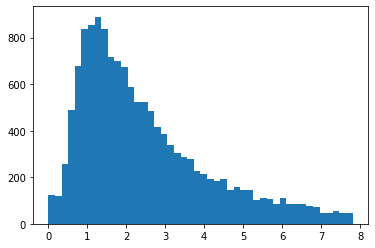

In [104]:
#check Normality by Histogram Before Normalization / Standerdization

%matplotlib inline  
plt.hist(train['distance'], bins='auto')

fare_amount


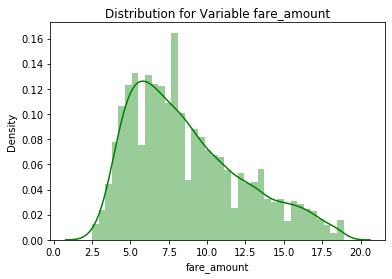

distance


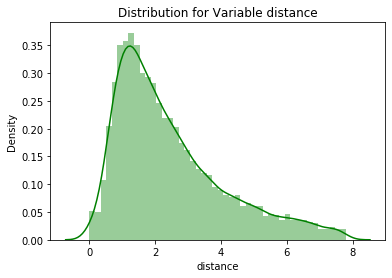

In [105]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

  Since data is little bit left skewed , we need to Normalize it

In [106]:
cnames = ["fare_amount", "distance"]

In [107]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

In [108]:
# #  OR

# # #Nomalisation

# for i in cnames:
#     print(i)
#     train[i] = (train[i] - min(train[i]))/(max(train[i]) - min(train[i]))

fare_amount


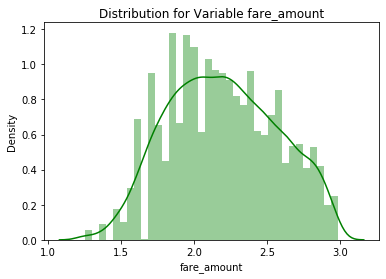

distance


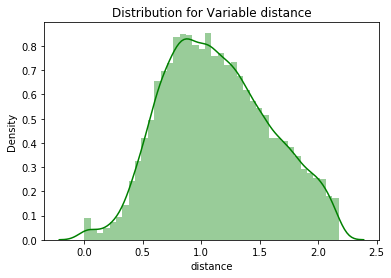

In [109]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [110]:

train.head(5)

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,1.704748,1,2009,6,15,0,17,0.708412
1,1.902108,2,2011,8,18,3,0,0.871095
2,2.163323,1,2012,4,21,5,4,1.334809
3,1.840550,1,2010,3,9,1,7,1.098331
4,2.572612,1,2011,1,6,3,9,1.565954


Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will not use any  Feature Scalling technique. i.e, Normalization or Standarization for our training data

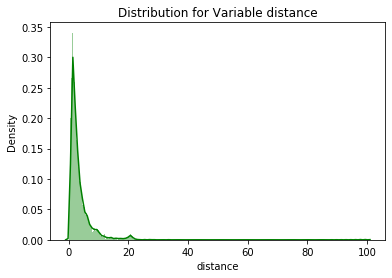

In [111]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [112]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

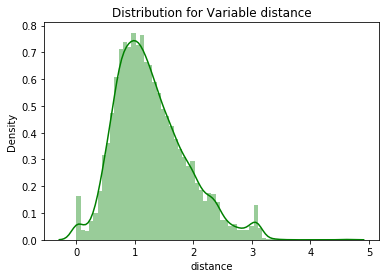

In [113]:
#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()


As we can see a bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our test data

# Applying ML ALgorithms: 

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [115]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.2, random_state = 1)

In [116]:
print(X_train.shape)
print(X_test.shape)

(11252, 7)
(2813, 7)


In [117]:
X_train.dtypes

passenger_count    category
year               category
Month              category
Date               category
Day                category
Hour               category
distance            float64
dtype: object

In [118]:
X_test.dtypes

passenger_count    category
year               category
Month              category
Date               category
Day                category
Hour               category
distance            float64
dtype: object

### Linear Regression Model :

Assumptions :
1. Linear realtionship between Dep and Ind Vars
2. TV Data should be Normally Distributed
3. There shouldnot be Multicolinearity between vars

In [119]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [120]:

#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [121]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [122]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [123]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.19822160108077408
Root Mean Squared Error For Test data = 0.19366737187677852


In [124]:
#calculate R^2 for train data = amount of variance in independent vars explained by dep var TV
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7152025489508687

In [125]:
r2_score(y_test, pred_test_LR)

0.7259282740789254

[ 4.24971734e-03  3.18765316e-02  4.52675365e-03 -4.12949953e-05
 -2.45503026e-03  9.36389526e-04  6.78222504e-01]


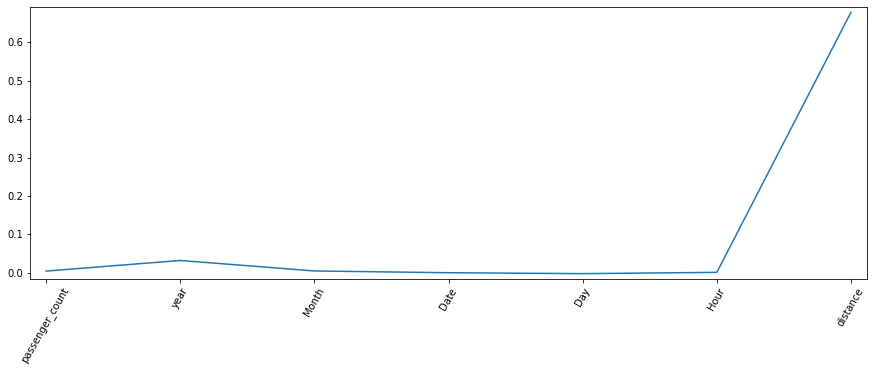

In [126]:

# Compute and print the coefficients
reg_coef = fit_LR.coef_
print(reg_coef)

# Plot the coefficients
plt.figure(figsize=(15,5))
plt.plot(range(len(test.columns)), reg_coef)
plt.xticks(range(len(test.columns)), test.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('linear coefficients')
plt.show()

### Decision tree Model : 

In [127]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [128]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [129]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [130]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.21942705439724527
Root Mean Squared Error For Test data = 0.21481169146209558


In [131]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.6510087929441057

In [132]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.6628158541908105

### Random Forest Model :

In [134]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [135]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [136]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [137]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.0728622525598647
Root Mean Squared Error For Test data = 0.18959912190838332


In [138]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9615196223548951

In [139]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.7373218434242867

[0.00374042 0.04109919 0.01217752 0.01253403 0.00962965 0.0220955
 0.89872369]


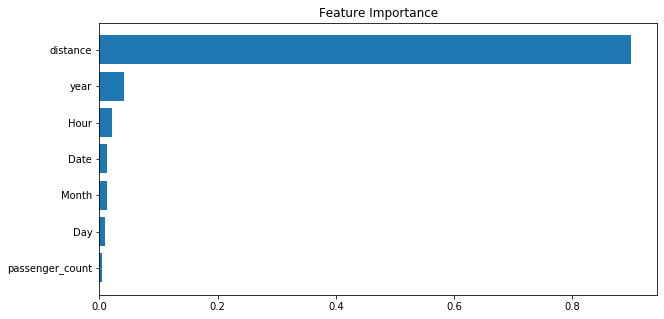

In [148]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestRegressor(n_estimators=100, min_samples_split= 2, min_samples_leaf=4, max_features='auto', max_depth=9, bootstrap=True)

# Fit the regressor to the data
Forest.fit(X_train,y_train)

# Compute and print the coefficients
Forest_features = Forest.feature_importances_
print(Forest_features)

# Sort feature importances in descending order
indices = np.argsort(Forest_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,5))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),Forest_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.savefig('Random forest feature importance')
plt.show()# Make predictions
# test_scores(Forest)

### Gradient Boosting :

In [140]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [141]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [142]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [143]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.18248370465833694
Root Mean Squared Error For Test data = 0.181678832114176


In [144]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.7586305411120287

In [145]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.7588096235249008

# Optimizing the Models results with parameters tuning :

1. Cross Validation techniques = Random Search CV & Grid Search CV,
2. Apply both on our best both models ie 1) Random S CV on Random Forest & Gradient Boosting 2) Grid Search CV on Random Forest & Gradient Boosting

#### Random Search CV on Random Forest Model


In [144]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [12]:
## n_estimators is the number of trees to be used in the forest.
# max_features on the other hand, determines the maximum number of features to consider while looking for a split.

# random_state=
# if you use random_state=some_number, then you can guarantee that the output of Run 1 will be equal to the output of Run 2, i.e. your split will be always the same.
# It doesn't matter what the actual random_state number is 42, 0, 21, ... The important thing is that everytime you use 42, you will always get the same output the first time you make the split.
# This is useful if you want reproducible results, for example in the documentation, so that everybody can consistently see the same numbers when they run the examples. 
# In practice I would say, you should set the random_state to some fixed number while you test stuff, but then remove it in production if you really need a random (and not a fixed) split.

In [146]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV


In [147]:
## Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.74.
RMSE =  0.1882771404872


#### Random Search CV on gradient boosting model

In [148]:
# To Look current parameters used by our current forest## 
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [149]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)                        # poor effcy

#R^2
gb_r2 = r2_score(y_test, predictions_gb)

#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.7.
RMSE =  0.20143281206819272


#### Grid Search CV for random Forest model

In [150]:
from sklearn.model_selection import GridSearchCV  

## Grid Search CV for random Forest model

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)

#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.75.
RMSE =  0.186341419852571


#### Grid Search CV for gradinet boosting

In [151]:
## Grid Search CV for gradinet boosting

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV                               50% time            
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.73.
RMSE =  0.191188194439061


In [152]:
# Random Search CV Random Forest Model
#     R-squared = 0.74.
#     RMSE =  0.1882771404872
# Random Search CV Gradient Boosting
#     R-squared = 0.7.
#     RMSE =  0.20143281206819272
    
    
# Grid Search CV for Random Forest Regressor        # = Best
#     R-squared = 0.75.
#     RMSE =  0.186341419852571
# Grid Search CV for gradinet boosting
#     R-squared = 0.73.
#     RMSE =  0.191188194439061

 As we can see that  Grid Search CV on RF model giving Best results, So we will apply it on Test Data

# Prediction of fare from provided test dataset :

We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using grid search CV for random forest model

In [154]:
  
## Grid Search CV for random Forest model


regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [158]:
predictions_GRF_test_Df

array([2.35490275, 2.37627355, 1.69570694, ..., 2.75115584, 2.76947833,
       2.04642574])

In [156]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [157]:
test.to_csv('tested.csv')